# Visualization of data for low latitude over Carajas province

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
import pandas as pd

from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'carajas_plot_data.ipynb'

### Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
#dir_modules = '../../../mypackage'
#sys.path.append(dir_modules)

In [6]:
#import auxiliary_functions as fc

#### Open a dictionary

In [7]:
data_set = dict()

#### Saving files

In [8]:
saved_files = []

## Loading data for SC intrusion

### Columns to load abd filename

In [9]:
filename = 'data_filtered_XYZ_area'

In [10]:
names = ['X','Y','LONG','LAT','MAGIGRF']

### Data set

In [11]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4),names=names,skipinitialspace=True,delim_whitespace=True).fillna(0)

## Total field anomaly

In [12]:
data_set['tfa_10'] = data.iloc[:,4].get_values()

In [13]:
data_set['x'] = data.iloc[:,1].get_values()
data_set['y'] = data.iloc[:,0].get_values()
data_set['height'] = -150.
data_set['z'] = data_set['height']*np.ones_like(data_set['x'])

## Survey information

In [14]:
data_set['N'] = np.size(data_set['tfa_10'])

In [15]:
data_set['dx'] = data_set['x'][0] - data_set['x'][1]

In [16]:
Nx = abs(int(((data_set['x'].max() - data_set['x'].min())/(data_set['dx']))))

In [17]:
Ny = data_set['N']/Nx

In [18]:
data_set['dy'] = abs(int(((data_set['y'].max() - data_set['y'].min())/(Ny-1))))

In [19]:
data_set['shape'] = Nx,Ny

In [20]:
print 'Shape : (%.0f,%.0f)'% data_set['shape'] 
print 'Number of data: %.1f' % data_set['N']
print 'dx: %.1f m' % data_set['dx']
print 'dy: %.1f m ' % data_set['dy']

Shape : (111,19)
Number of data: 2123.0
dx: -298.0 m
dy: 1839.0 m 


### Main field

In [21]:
inc_gf = 7.97

In [22]:
dec_gf = -17.29

In [23]:
data_set['main_field'] = inc_gf,dec_gf 

In [24]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 8.0 degree
Main field declination: -17.3 degree


### Real data visualization

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


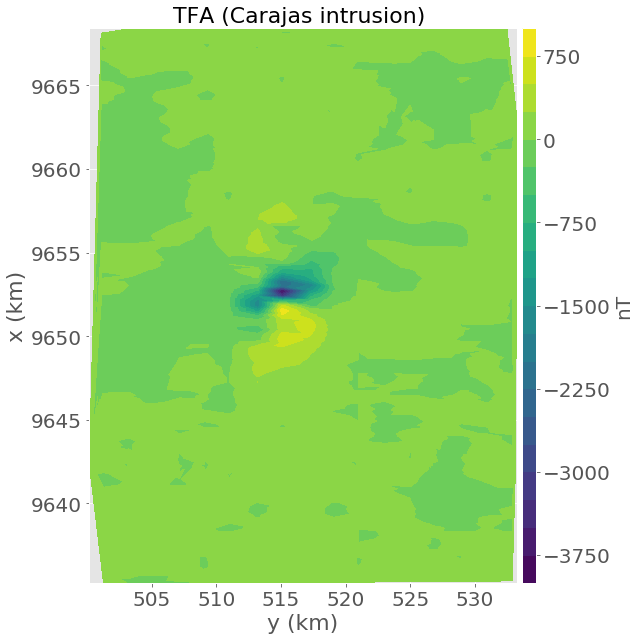

In [25]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(9,9), tight_layout=True)

plt.title('TFA (Carajas intrusion) ', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],data_set['tfa_10'],20, cmap='viridis')
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/carajas_real_data'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

#### Generating .pickle file

In [26]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [27]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)

### Saved files

In [28]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/carajas_real_data.png
2  data/data_set.pickle
